In [2]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


(256, 256)


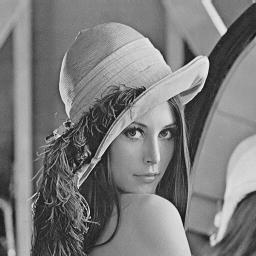

In [4]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg.shape)
#plt.imshow(gimg, cmap='gray')
cv2_imshow(gimg)

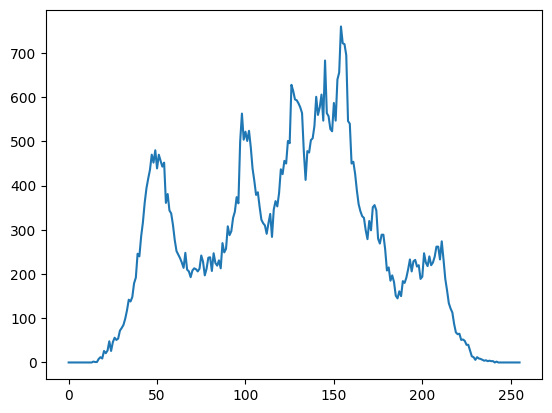

In [5]:
hist = cv2.calcHist([gimg], [0] , None, [256], [0,255])
plt.plot(hist)

(256, 256)


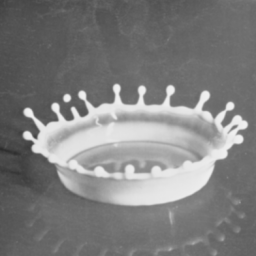

In [6]:
#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images/rice.bmp')
#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images/cell.bmp')
#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images/cell-bright.bmp')
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images/milkdrop.bmp')

RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg.shape)
#plt.imshow(gimg, cmap='gray')
cv2_imshow(gimg)

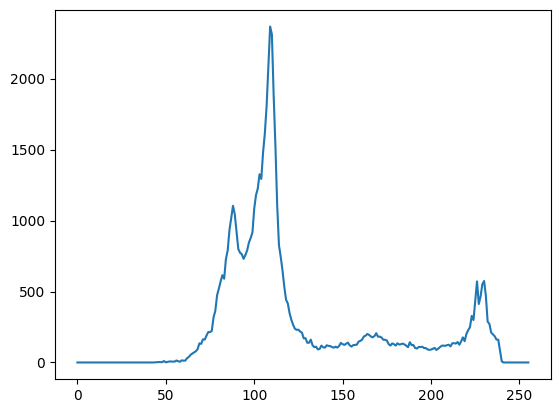

In [7]:
hist = cv2.calcHist([gimg], [0] , None, [256], [0,255])
plt.plot(hist)

In [8]:
gBin = np.zeros((gimg.shape[0], gimg.shape[1]))

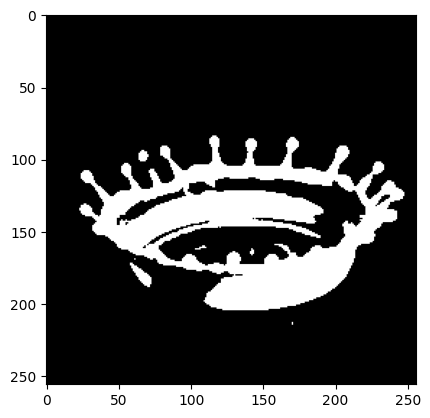

In [9]:
T = 180

for h in range (gimg.shape[0]):
  for w in range(gimg.shape[1]):
    if (gimg[h,w] > T):
      gBin[h,w] = 255
    else:
      gBin[h,w] = 0

#cv2_imshow(gBin)
plt.imshow(gBin, cmap='gray')

In [40]:
T1 = 50
T2 = 0
T0 = 1

outimg = np.zeros((gimg.shape[0], gimg.shape[1]))

In [45]:
def threshold_update(img, output, T1):
  sum1 = 0
  count1 = 1
  sum2 = 0
  count2 = 1

  for h in range (img.shape[0]):
    for w in range(img.shape[1]):
      if(output[h,w] == 255):
        sum1 = sum1 + img[h,w]
        count1 = count1 + 1
      else:
        sum2 = sum2 + img[h,w]
        count2 = count2 + 1

  avg1 = sum1 / count1
  avg2 = sum2 / count2

  T2 = np.int32(avg1 +avg2)/2
  return T2

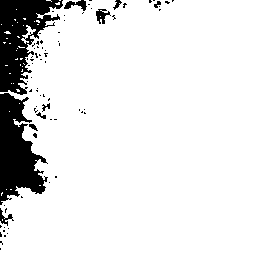

In [46]:
for h in range(gimg.shape[0]):
  for w in range(gimg.shape[1]):
    if (gimg[h,w] > T1):
      outimg[h,w] = 255
    else:
      outimg[h,w] = 0

cv2_imshow(outimg)

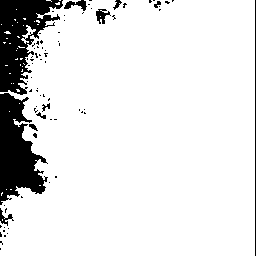

In [50]:
while True:
  T2 = threshold_update(gimg, outimg, T1)

  if(np.abs(T2-T1) < T0):
    for h in range(gimg.shape[0]):
      for w in range(gimg.shape[1]):
        if (gimg[h,w] > T2):
         outimg[h,w] = 255
      else:
        outimg[h,w] = 0
    break
  else:
    T1 = T2

cv2_imshow(outimg)

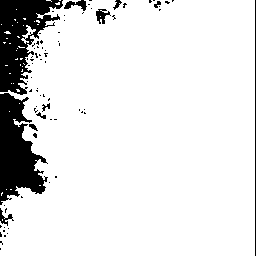

In [49]:
cv2_imshow(outimg)